In [3]:
from __future__ import print_function, division  # Python 2 compatibility if needed


In [42]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl

from scipy import optimize       # to compare

import seaborn as sns
sns.set(context="talk", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.05)

FIGSIZE = (14, 8)  #: Figure size, in inches!
mpl.rcParams['figure.figsize'] = FIGSIZE

In [44]:
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = random_start()
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [46]:
interval = (-10, 10)

def f(x):
    """ Function to minimize."""
    return x ** 2

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

In [48]:
def random_start():
    """ Random point in the interval."""
    a, b = interval
    return a + (b - a) * rn.random_sample()

In [50]:
def cost_function(x):
    """ Cost of x = f(x)."""
    return f(x)

In [52]:
def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

In [54]:
def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p

In [56]:
def temperature(fraction):
    """ Example of temperature dicreasing as the process goes on."""
    return max(0.01, min(1, 1 - fraction))

In [57]:
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=30, debug=True);


Step # 0/30 : T =    1, state =  9.9, cost = 97.9, new_state =  9.9, new_cost = 97.9 ...
Step # 1/30 : T = 0.967, state =  9.9, cost = 97.9, new_state = 9.88, new_cost = 97.6 ...
Step # 2/30 : T = 0.933, state = 9.88, cost = 97.6, new_state = 9.86, new_cost = 97.2 ...
Step # 3/30 : T =  0.9, state = 9.86, cost = 97.2, new_state = 9.88, new_cost = 97.6 ...
Step # 4/30 : T = 0.867, state = 9.88, cost = 97.6, new_state = 9.89, new_cost = 97.8 ...
Step # 5/30 : T = 0.833, state = 9.89, cost = 97.8, new_state = 9.88, new_cost = 97.7 ...
Step # 6/30 : T =  0.8, state = 9.88, cost = 97.7, new_state =   10, new_cost =  100 ...
Step # 7/30 : T = 0.767, state = 9.88, cost = 97.7, new_state = 9.71, new_cost = 94.3 ...
Step # 8/30 : T = 0.733, state = 9.71, cost = 94.3, new_state = 9.77, new_cost = 95.5 ...
Step # 9/30 : T =  0.7, state = 9.71, cost = 94.3, new_state = 9.74, new_cost = 94.9 ...
Step #10/30 : T = 0.667, state = 9.71, cost = 94.3, new_state = 9.85, new_cost = 96.9 ...
Step #11/30 : 

In [60]:
state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)

state
c

0.0043753850682325636

In [61]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()

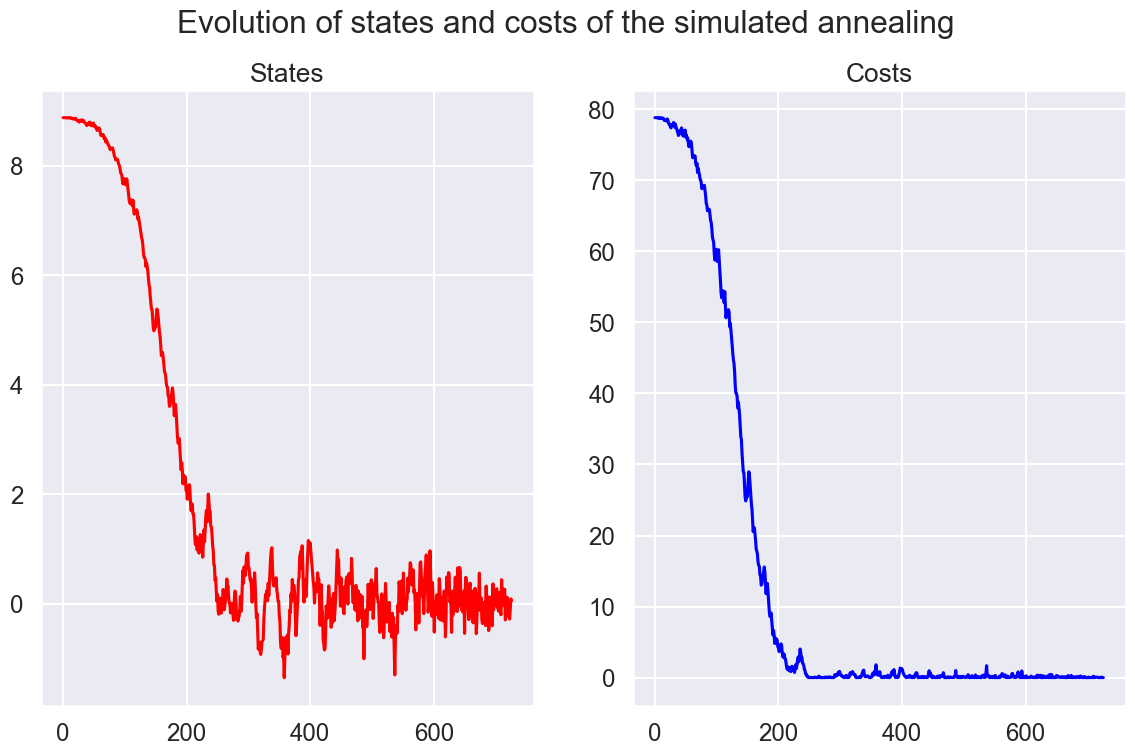

In [64]:
see_annealing(states, costs)


In [66]:
def visualize_annealing(cost_function):
    state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)
    see_annealing(states, costs)
    return state, c

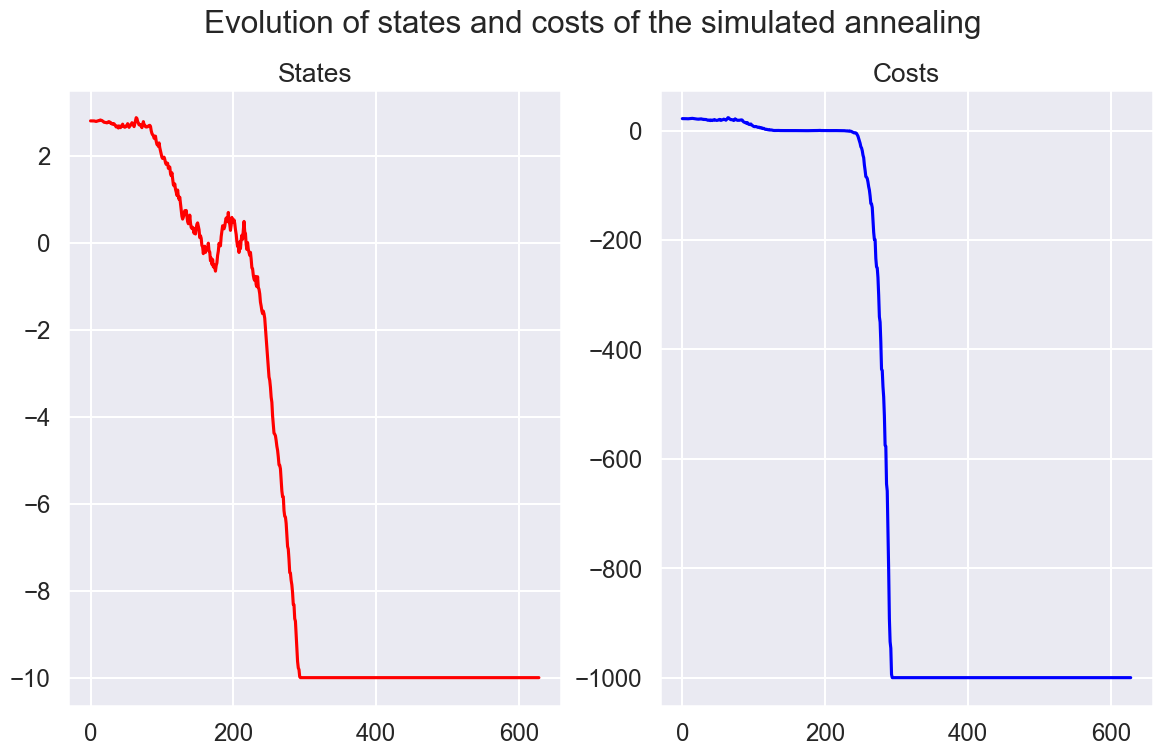

(-10, -1000)

In [68]:
visualize_annealing(lambda x: x**3)

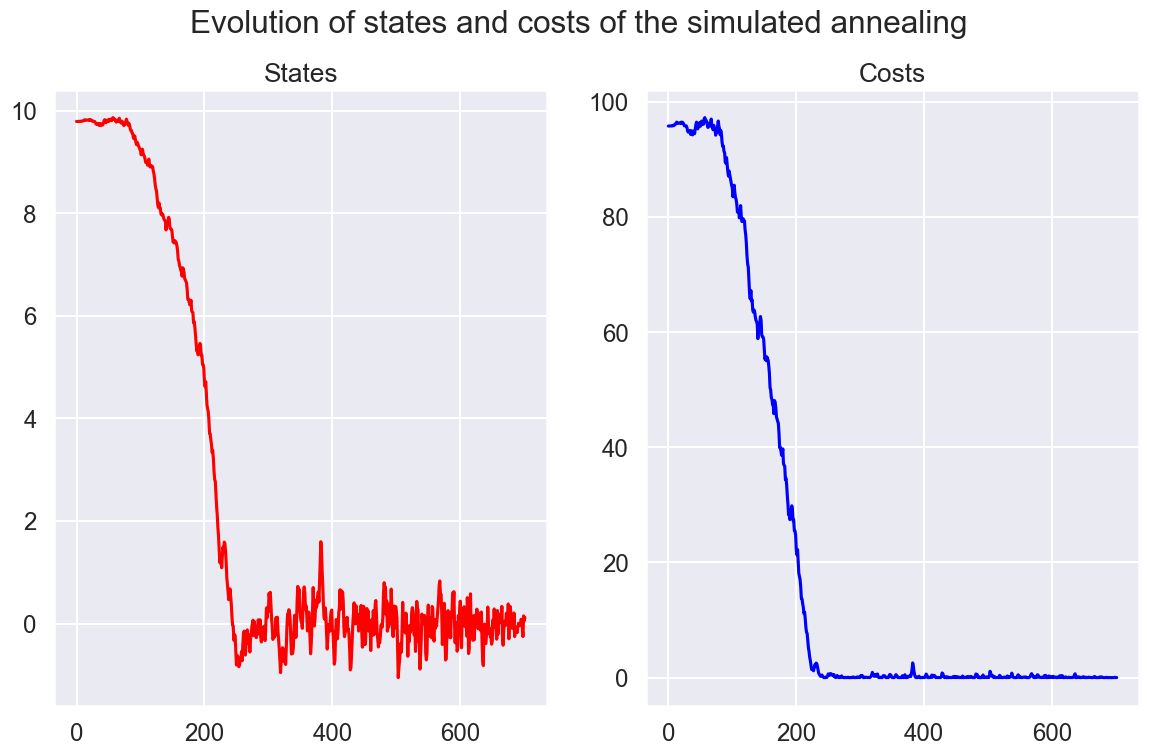

(0.12028067553180904, 0.014467440906388327)

In [70]:
visualize_annealing(lambda x: x**2)


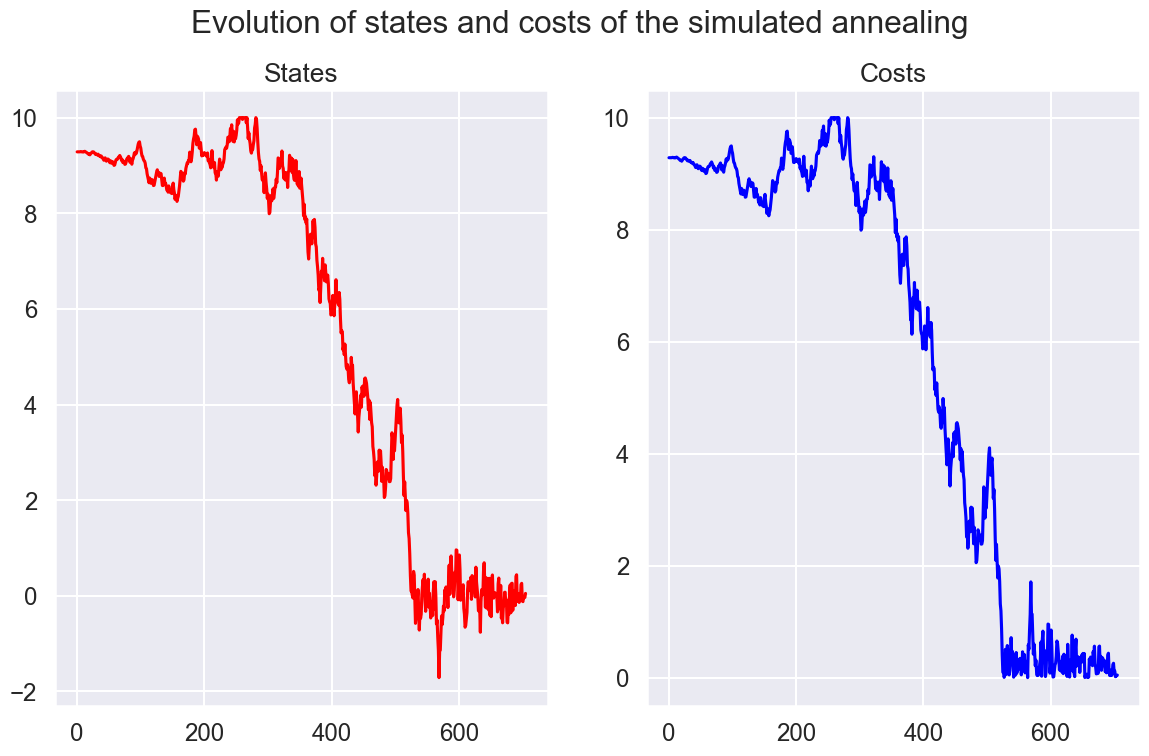

(0.049215678518651496, 0.049215678518651496)

In [72]:
visualize_annealing(np.abs)


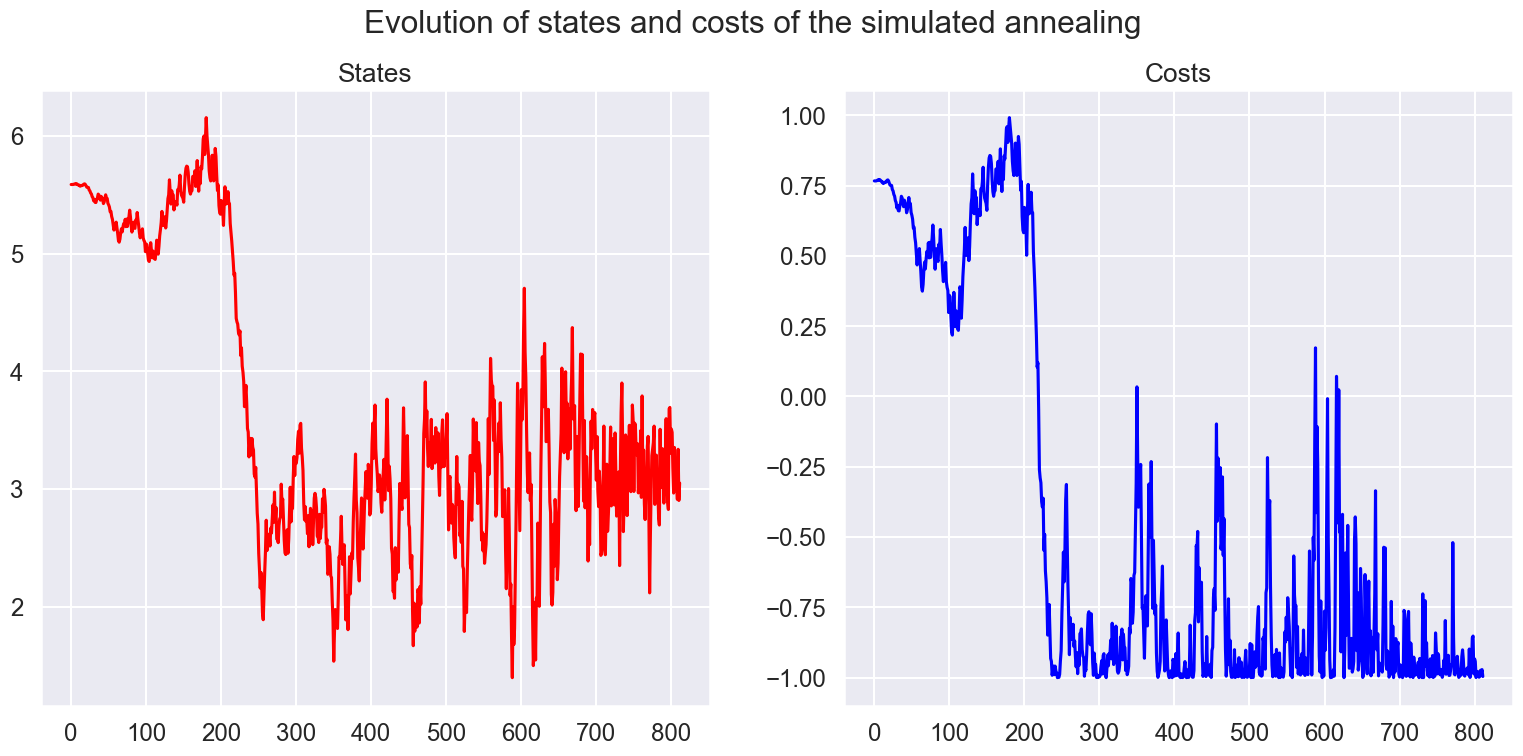

(3.0500440797567094, -0.9958123553107968)

In [38]:
visualize_annealing(np.cos)


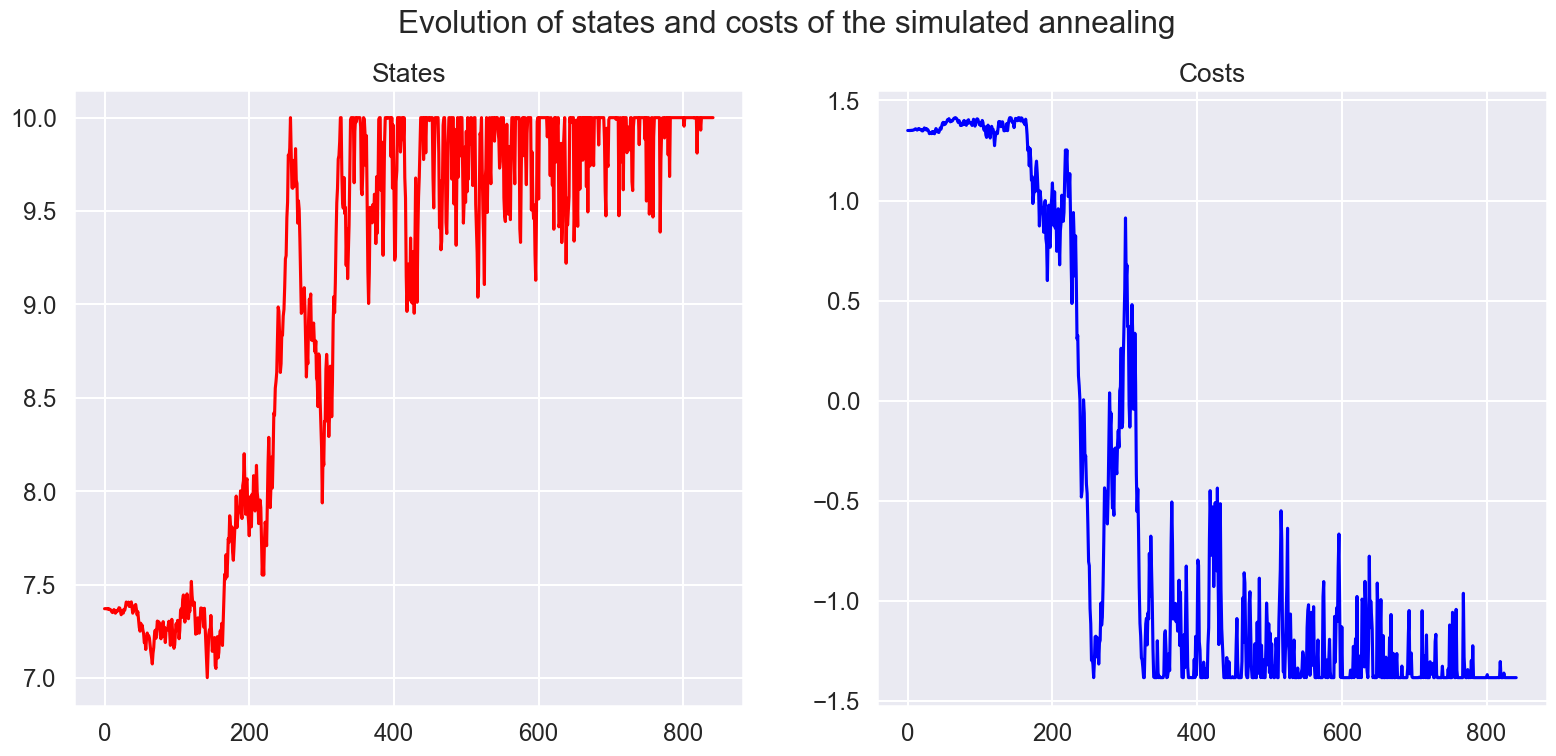

(10, -1.383092639965822)

In [40]:
visualize_annealing(lambda x: np.sin(x) + np.cos(x))
